In [240]:
import re
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import LatentDirichletAllocation
from kiwipiepy import Kiwi

kiwi = Kiwi()

print(os.getcwd())
# Load dataset
df = pd.read_csv('./data/jobkorea_crawled_with_manual_v1.csv', encoding='utf-8-sig')
df.to_csv('./data/bak_jobkorea_crawled_preprocessed_3_v3.csv', index=False, encoding='utf-8-sig')

df['복지 및 혜택'] = df['복지 및 혜택'].astype(str).fillna("")
df['채용절차'] = df['채용절차'].astype(str).fillna("")
df['업종'] = df['업종'].astype(str).fillna("")
df['급여'] = df['급여'].astype(str).fillna("")
df['상세게시글id'] = df['상세게시글id'].astype(str).fillna("")
df['주요업무'] = df['주요업무'].astype(str).fillna("")
df['우대사항'] = df['우대사항'].astype(str).fillna("")
df['스킬'] = df['스킬'].astype(str).fillna("")

df.isna().sum()

D:\Repos\potenup_ai3\jinwoo


채용제목       0
근무지        0
경력         0
학력         0
고용형태       0
상세게시글id    0
회사         0
상세url      0
주요업무       0
자격요건       0
우대사항       0
스킬         0
채용절차       0
급여         0
업종         0
복지 및 혜택    0
dtype: int64

In [241]:
#df.to_csv('./data/bak_jobkorea_crawled_preprocessed_v4.csv', index=False, encoding='utf-8-sig')

In [242]:
jobmain = []
require = []
prefer = []

for job in df['주요업무']:
    jobmain.append(kiwi.analyze(job))

for req in df['자격요건']:
    require.append(kiwi.analyze(req))

for pre in df['우대사항']:
    prefer.append(kiwi.analyze(pre))

token_require = []
token_prefer = []

jobmain_word_list = []
require_word_list = []
prefer_word_list = []

# TransactionEncoder용: 문서별 단어 리스트의 리스트
jobmain_word_list2 = []
require_word_list2 = []
prefer_word_list2 = []

for token in jobmain:
    for tiple in token:
        token_jobmain = []
        for ist in tiple[0]:
            if ist.tag not in ('NNG', 'SL') or len(ist.form) < 2:
                continue
            token_jobmain.append(ist.form)
        result_str = " ".join(token_jobmain)
        jobmain_word_list.append(result_str)
        # 각 문서의 단어 리스트를 추가 (리스트의 리스트)
        jobmain_word_list2.append(token_jobmain)

for token in require:
    for tiple in token:
        token_require = []
        for ist in tiple[0]:
            if ist.tag not in ('NNG', 'SL') or len(ist.form) < 2:
                continue
            token_require.append(ist.form)
        result_str = " ".join(token_require)
        require_word_list.append(result_str)
        # 각 문서의 단어 리스트를 추가 (리스트의 리스트)
        require_word_list2.append(token_require)

for token in prefer:
    for tiple in token:
        token_prefer = []
        for ist in tiple[0]:
            if ist.tag not in ('NNG', 'SL') or len(ist.form) < 2:
                continue
            token_prefer.append(ist.form)
        result_str = " ".join(token_prefer)
        prefer_word_list.append(result_str)
        # 각 문서의 단어 리스트를 추가 (리스트의 리스트)
        prefer_word_list2.append(token_prefer)

for ist in jobmain_word_list:
    print(ist)
for ist in require_word_list:
    print(ist)
for ist in prefer_word_list:
    print(ist)



업무 Hybrid Research Loop 설계 사용자 질문 분석 사내 DB Elasticsearch 외부 Web Search 탐색 결정 지능 Intelligent Routing 알고리즘 구현 Multi Source 정보 통합 정형 사내 문서 JSON Text 정형 데이터 HTML LLM 이해 형태 표준 문맥 통합 Synthesis 파이프라인 개발 Deep Research 에이전트 고도 단답 검색 계획 Plan 다단계 검색 검증 Critic 수정 과정 순환 에이전트 아키텍처 설계 LangGraph 활용 Search Relevance 최적 Hybrid Search Keyword Semantic 결과 검색 결과 통합 랭킹 Re ranking 환각 Hallucination 최소 정확도 인용 Citation 시스템 구현 최종 답변 문장 사내 문서 외부 기사 출처 표기 Grounding 로직 구현
담당 업무 멀티 모달 광고 소재 융합 파이프라인 개발 생성 AI 콘텐츠 자연 광고 상품 매칭 로직 구현 GPT Gemini Vision Pro Stable Diffusion Sora 계열 모델 멀티 모달 API 적용 LangChain LangGraph 기반 에이전트 워크 설계 파이프라인 구축 LangSmith 기반 실험 관리 평가 관찰 Observability 환경 운영 광고 커머스 SNS 문맥 기반 생성 Agent 설계 멀티 모달 입력 처리 가능 Agent Orchestration 구조 개발 Agent 자동 의사 결정 추론 행동 로직 엔드 모듈 설계 이미지 오디오 비디오 처리 엔드 개발 규모 멀티 모달 모델 추론 서버 운영 Triton TorchServe
주요 업무 AI 기반 개발자 서비스 개발 운영 개발자 업무 효율 서비스 주도 개발 LLM 외부 AI 서비스 활용 서비스 핵심 기능 설계 구현 서비스 목적 효과 프롬프트 에이전트 파이프라인 설계 지속 고도 AI 기술 리서치 가치 검증 개발 생산 극대 최신 AI 기술 모델 프레임 워크 리서치 기술 검증 실효 검증
담당 업무 L

In [243]:
from sklearn.feature_extraction.text import CountVectorizer

jobmain_count_vectorizer = CountVectorizer(
    max_df=0.1,
    min_df=2,
    max_features=1000,
    ngram_range=(1, 2)
)
jobmain_feat_vec = jobmain_count_vectorizer.fit_transform(jobmain_word_list)

require_count_vectorizer = CountVectorizer(
    max_df=0.1,
    min_df=2,
    max_features=1000,
    ngram_range=(1, 2)
)
require_feat_vec = require_count_vectorizer.fit_transform(require_word_list)

prefer_count_vectorizer = CountVectorizer(
    max_df=0.1,
    min_df=2,
    max_features=1000,
    ngram_range=(1, 2)
)
prefer_feat_vec = prefer_count_vectorizer.fit_transform(prefer_word_list)

In [244]:
jobmain_feat_vec
require_feat_vec
prefer_feat_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2784 stored elements and shape (95, 893)>

In [245]:
jobmain_df_vec = pd.DataFrame(
    jobmain_feat_vec.toarray(),
    columns=jobmain_count_vectorizer.get_feature_names_out()
)
jobmain_df_vec.head()

require_df_vec = pd.DataFrame(
    require_feat_vec.toarray(),
    columns=require_count_vectorizer.get_feature_names_out()
)
require_df_vec.head()

prefer_df_vec = pd.DataFrame(
    prefer_feat_vec.toarray(),
    columns=prefer_count_vectorizer.get_feature_names_out()
)
prefer_df_vec.head()

,account,account 프로젝트,acl,agent builder,agent orchestration,agent 개발,agent 서비스,agent 시스템,agentic,agentic ai,...,활용 ai,활용 가능,활용 개발,활용 능력,활용 서비스,활용 실제,활용 에이전트,활용 최적,활용 프로젝트,활용 확장
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
import pyLDAvis.lda_model

In [247]:
jobmain_lda = LatentDirichletAllocation(n_components=3)
require_lda = LatentDirichletAllocation(n_components=3)
prefer_lda = LatentDirichletAllocation(n_components=3)

jobmain_lda.fit(jobmain_feat_vec)
require_lda.fit(require_feat_vec)
prefer_lda.fit(prefer_feat_vec)



,"n_components n_components: int, default=10Number of topics... versionchanged:: 0.19 ``n_topics`` was renamed to ``n_components``",3
,"doc_topic_prior doc_topic_prior: float, default=NonePrior of document topic distribution `theta`. If the value is None,defaults to `1 / n_components`.In [1]_, this is called `alpha`.",None
,"topic_word_prior topic_word_prior: float, default=NonePrior of topic word distribution `beta`. If the value is None, defaultsto `1 / n_components`.In [1]_, this is called `eta`.",None
,"learning_method learning_method: {'batch', 'online'}, default='batch'Method used to update `_component`. Only used in :meth:`fit` method.In general, if the data size is large, the online update will be muchfaster than the batch update.Valid options:- 'batch': Batch variational Bayes method. Use all training data in each EM update. Old `components_` will be overwritten in each iteration.- 'online': Online variational Bayes method. In each EM update, use mini-batch of training data to update the ``components_`` variable incrementally. The learning rate is controlled by the ``learning_decay`` and the ``learning_offset`` parameters... versionchanged:: 0.20 The default learning method is now ``""batch""``.",'batch'
,"learning_decay learning_decay: float, default=0.7It is a parameter that control learning rate in the online learningmethod. The value should be set between (0.5, 1.0] to guaranteeasymptotic convergence. When the value is 0.0 and batch_size is``n_samples``, the update method is same as batch learning. In theliterature, this is called kappa.",0.7
,"learning_offset learning_offset: float, default=10.0A (positive) parameter that downweights early iterations in onlinelearning. It should be greater than 1.0. In the literature, this iscalled tau_0.",10.0
,"max_iter max_iter: int, default=10The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the :meth:`fit` method, and not the:meth:`partial_fit` method.",10
,"batch_size batch_size: int, default=128Number of documents to use in each EM iteration. Only used in onlinelearning.",128
,"evaluate_every evaluate_every: int, default=-1How often to evaluate perplexity. Only used in `fit` method.set it to 0 or negative number to not evaluate perplexity intraining at all. Evaluating perplexity can help you check convergencein training process, but it will also increase total training time.Evaluating perplexity in every iteration might increase training timeup to two-fold.",-1
,"total_samples total_samples: int, default=1e6Total number of documents. Only used in the :meth:`partial_fit` method.",1000000.0
,"perp_tol perp_tol: float, default=1e-1Perplexity tolerance. Only used when ``evaluate_every`` is greater than 0.",0.1


In [248]:
from IPython.core.display import Markdown
pyLDAvis.enable_notebook()
jobmain_vis = pyLDAvis.lda_model.prepare(jobmain_lda, jobmain_feat_vec, jobmain_count_vectorizer)
require_vis = pyLDAvis.lda_model.prepare(require_lda, require_feat_vec, require_count_vectorizer)
prefer_vis = pyLDAvis.lda_model.prepare(prefer_lda, prefer_feat_vec, prefer_count_vectorizer)



In [249]:
pyLDAvis.display(jobmain_vis)

In [250]:
pyLDAvis.display(require_vis)

In [251]:
pyLDAvis.display(prefer_vis)


In [252]:
# 대안 시각화: 토픽별 주요 단어 출력 (pyLDAvis 없이도 사용 가능)
def display_topic_words(model, feature_names, n_top_words=10, topic_name=""):
    """각 토픽의 주요 단어를 출력"""
    print(f"\n{'='*60}")
    print(f"{topic_name} 토픽별 주요 단어")
    print(f"{'='*60}")
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:][::-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = [topic[i] for i in top_features_ind]
        print(f"\n토픽 {topic_idx}:")
        for word, weight in zip(top_features, weights):
            print(f"  {word}: {weight:.4f}")

# 각 카테고리별 토픽 주요 단어 출력
display_topic_words(jobmain_lda, jobmain_count_vectorizer.get_feature_names_out(), topic_name="주요업무")
display_topic_words(require_lda, require_count_vectorizer.get_feature_names_out(), topic_name="자격요건")
display_topic_words(prefer_lda, prefer_count_vectorizer.get_feature_names_out(), topic_name="우대사항")



주요업무 토픽별 주요 단어

토픽 0:
  설계 운영: 8.3987
  end: 8.3333
  인프라: 8.0988
  과제: 7.3683
  참여: 7.3428
  사용: 7.3332
  인터페이스: 7.2228
  관련: 6.3594
  ux: 6.3414
  지원: 6.3397

토픽 1:
  로봇: 13.5446
  ai 기술: 10.3183
  devops: 9.3241
  게임: 9.2775
  체계: 9.2625
  리서치: 8.3331
  retrieval: 8.3278
  시스템 개발: 7.0578
  에이전트 개발: 6.3429
  이미지: 6.3395

토픽 2:
  로봇: 12.1637
  알고리즘: 11.3218
  search: 7.3408
  엔드 개발: 6.4061
  수집: 6.3588
  시뮬레이션: 6.3569
  추론: 6.3470
  스케줄: 6.3332
  agentic ai: 6.3315
  db: 6.2930

자격요건 토픽별 주요 단어

토픽 0:
  경험 git: 6.3469
  vision: 6.3332
  적용: 6.3261
  학위: 6.1200
  rest api: 6.1191
  rest: 6.1191
  머신 러닝: 5.9969
  머신: 5.9969
  기반 ai: 5.3769
  vector db: 5.3472

토픽 1:
  생성: 8.3531
  요건 학력: 8.3161
  경력 경력: 8.2055
  이상 경력: 8.1598
  처리: 7.3443
  인프라: 7.0705
  실제: 6.3516
  효율: 6.3435
  실험: 6.3239
  기획: 6.2664

토픽 2:
  이해도: 8.2492
  지원 자격: 7.5056
  컴퓨터 공학: 7.3386
  문제 해결: 7.3369
  경험 보유: 7.3338
  졸업: 7.3291
  ai 기술: 7.2981
  분야: 7.0117
  소통: 6.3537
  알고리즘: 6.3368

우대사항 토픽별 주요 단어

토픽 0:
  게임: 1

In [253]:
jobmain_sent_topic = jobmain_lda.transform(jobmain_feat_vec)
require_sent_topic = require_lda.transform(require_feat_vec)
prefer_sent_topic = prefer_lda.transform(prefer_feat_vec)

In [254]:
jobmain_idx_list = []
jobmain_prob_list = []

for sent in jobmain_sent_topic:
    topic_idx = sent.argmax()
    topic_prob = sent.max()

    jobmain_idx_list.append(topic_idx)
    jobmain_prob_list.append(topic_prob)

df['주요업무_topic_no'] = jobmain_idx_list
df['주요업무_topic_prob'] = jobmain_prob_list

In [255]:
require_idx_list = []
require_prob_list = []

for sent in require_sent_topic:
    topic_idx = sent.argmax()
    topic_prob = sent.max()

    require_idx_list.append(topic_idx)
    require_prob_list.append(topic_prob)

df['자격요건_topic_no'] = require_idx_list
df['자격요건_topic_prob'] = require_prob_list

In [256]:
prefer_idx_list = []
prefer_prob_list = []

for sent in prefer_sent_topic:
    topic_idx = sent.argmax()
    topic_prob = sent.max()

    prefer_idx_list.append(topic_idx)
    prefer_prob_list.append(topic_prob)

df['우대사항_topic_no'] = prefer_idx_list
df['우대사항_topic_prob'] = prefer_prob_list

In [257]:
df['주요업무_topic_no'].value_counts()

주요업무_topic_no
1    41
0    28
2    26
Name: count, dtype: int64

In [258]:
df['자격요건_topic_no'].value_counts()

자격요건_topic_no
2    42
0    27
1    26
Name: count, dtype: int64

In [259]:
df['우대사항_topic_no'].value_counts()

우대사항_topic_no
2    37
0    33
1    25
Name: count, dtype: int64

In [260]:
for no in df['주요업무_topic_no'].unique():
    txt = df.loc[ df['주요업무_topic_no'] == no, : ].sort_values(by='주요업무_topic_prob', ascending=False).head(3)

In [261]:
for no in df['자격요건_topic_no'].unique():
    txt = df.loc[ df['자격요건_topic_no'] == no, : ].sort_values(by='자격요건_topic_prob', ascending=False).head(3)

In [262]:
for no in df['우대사항_topic_no'].unique():
    txt = df.loc[ df['우대사항_topic_no'] == no, : ].sort_values(by='우대사항_topic_prob', ascending=False).head(3)

In [263]:
df['주요업무_topic_prob'].groupby(df['주요업무_topic_no']).nlargest(5)

jobmain_n_topic = df['주요업무_topic_no'].nunique()
print(f'{jobmain_n_topic}개의 주요업무 토픽이 발견되었습니다.')

for n in range(jobmain_n_topic):
    print(f'\n=== 주요업무 토픽 {n} ===')
    jobmain_topic_df = df.loc[df ["주요업무_topic_no"] == n, : ].sort_values(by='주요업무_topic_prob', ascending=False)
    for i in range(3):
        print(jobmain_topic_df['주요업무'].values[i])


3개의 주요업무 토픽이 발견되었습니다.

=== 주요업무 토픽 0 ===
이런 업무를 해요
ㆍAI Agent 및 LLM 기반 서비스의 설계, 개발, 운영 총괄
ㆍ고객사 환경에 맞춘 맞춤형 모델 커스터마이징 및 통합 개발
ㆍ주요 Big Account(대형 고객, 주로 그룹사) 대상 기술 PoC 및 솔루션 제안
ㆍ팀 내 개발자들과 함께 직접 코드를 작성하고 문제를 해결하는 핸즈온 리더 역할 수행
ㆍ프로젝트 일정, 품질, 리소스 관리 등 엔드투엔드(End-to-End) 개발 리드
ㆍ고객사 기술 담당자와의 커뮤니케이션 및 기술 협상 주도
ㆍ기술 문서화 및 내부 개발 가이드 표준화
이런 업무를 해요
ㆍAI Agent 및 LLM 기반 서비스의 설계, 개발, 운영 총괄
ㆍ고객사 환경에 맞춘 맞춤형 모델 커스터마이징 및 통합 개발
ㆍ주요 Big Account(대형 고객, 주로 그룹사) 대상 기술 PoC 및 솔루션 제안
ㆍ팀 내 개발자들과 함께 직접 코드를 작성하고 문제를 해결하는 핸즈온 리더 역할 수행
ㆍ프로젝트 일정, 품질, 리소스 관리 등 엔드투엔드(End-to-End) 개발 리드
ㆍ고객사 기술 담당자와의 커뮤니케이션 및 기술 협상 주도
ㆍ기술 문서화 및 내부 개발 가이드 표준화
이런 업무를 해요
ㆍReinforcement learning for LLM (math, code, general reasoning, tool use)
ㆍEfficient & effective reasoning
ㆍA scalable agentic tool use data synthesis pipeline
ㆍLanguage-specific reward models
ㆍPrecise instruction following
* 기술의 흐름과 상황에 따라서 개발하는 프로젝트는 변화하며, 프로젝트는 각 시점에 LLM 모델 발전에 가장 영향력있는 기술 요소에 집중합니다.

=== 주요업무 토픽 1 ===
이런 업무를 해요
ㆍ고객사 요구사항 분석 후 맞춤형 기능 구현 및 통합 개발
ㆍAgent Framework

In [264]:
df['자격요건_topic_prob'].groupby(df['자격요건_topic_no']).nlargest(5)

jobmain_n_topic = df['자격요건_topic_no'].nunique()
print(f'{jobmain_n_topic}개의 자격요건 토픽이 발견되었습니다.')

for n in range(jobmain_n_topic):
    print(f'\n=== 자격요건 토픽 {n} ===')
    jobmain_topic_df = df.loc[df ["자격요건_topic_no"] == n, : ].sort_values(by='자격요건_topic_prob', ascending=False)
    for i in range(3):
        print(jobmain_topic_df['자격요건'].values[i])


3개의 자격요건 토픽이 발견되었습니다.

=== 자격요건 토픽 0 ===
[자격요건]
ㆍ머신러닝/딥러닝 관련 경력 5년 이상
ㆍAI Agent, LLM Application, 혹은 Chat/Action 기반 서비스 개발 경험
ㆍPython, Node.js, TypeScript 등 하나 이상의 프로그래밍 언어에 능숙
ㆍOpenAI API, LangChain, RAG, Vector DB 등 AI Framework 활용 경험
ㆍ고객사 기술 담당자 및 내부 조직과의 원활한 커뮤니케이션/조율 능력
ㆍAI 솔루션 개발 스타트업 또는 대규모 프로젝트에서의 핸즈온 개발 리딩 경험
ㆍ시스템 아키텍처 설계, MLOps, API 연동에 대한 이해
[자격요건]
ㆍ머신러닝/딥러닝 관련 경력 5년 이상
ㆍAI Agent, LLM Application, 혹은 Chat/Action 기반 서비스 개발 경험
ㆍPython, Node.js, TypeScript 등 하나 이상의 프로그래밍 언어에 능숙
ㆍOpenAI API, LangChain, RAG, Vector DB 등 AI Framework 활용 경험
ㆍ고객사 기술 담당자 및 내부 조직과의 원활한 커뮤니케이션/조율 능력
ㆍAI 솔루션 개발 스타트업 또는 대규모 프로젝트에서의 핸즈온 개발 리딩 경험
ㆍ시스템 아키텍처 설계, MLOps, API 연동에 대한 이해
이런 일을 해요

ㆍ엔솔의 자체 Agentic AI플랫폼을 활용하여 사내 다양한 업무를 AI Agent 기반으로

    자동화할 수 있도록 서비스를 설계/개발합니다.

ㆍLLM기반 AI 서비스의 아키텍처를 설계하고, 개발하며, 좋은 품질의 답변이 만들어 질 수

    있도록 모델 프롬프트 엔지니어링 및 성능 최적화작업을 수행합니다.

ㆍLLM 기반 AI 서비스를 배포/운영하면서 사용자의 피드백을 받아 엔솔의 AI 플랫폼과

    서비스를 더 나은 모습으로 개선해 나갑니다.

ㆍ엔솔의 Agentic AI 플랫폼에 대한 오너십을 가지고 가장 좋은 성능을 낼 수 있도록 최신

     

In [265]:
df['우대사항_topic_prob'].groupby(df['우대사항_topic_no']).nlargest(5)

jobmain_n_topic = df['우대사항_topic_no'].nunique()
print(f'{jobmain_n_topic}개의 우대사항 토픽이 발견되었습니다.')

for n in range(jobmain_n_topic):
    print(f'\n=== 우대사항 토픽 {n} ===')
    jobmain_topic_df = df.loc[df ["우대사항_topic_no"] == n, : ].sort_values(by='우대사항_topic_prob', ascending=False)
    for i in range(3):
        print(jobmain_topic_df['우대사항'].values[i])

3개의 우대사항 토픽이 발견되었습니다.

=== 우대사항 토픽 0 ===
우대사항

▶ 속도 지향형 개발: 완벽한 설계를 고민하기보다, 빠르게 실행(MVP)하고 피드백을 통해 개선하는 방식을 즐기시는 분

▶ Product-Minded: 단순히 코드를 짜는 것을 넘어, 실제 고객에게 제공될 서비스의 가치와 사용자 경험을 고민하시는 분

▶ 자기 주도적 문제 해결: 기술적 난관 앞에서 Claude, Gemini 등 AI 에이전트를 도구로 활용해 최적의 해답을 찾아내시는 분

▶ 유지보수 책임감: 빠른 개발 속도 속에서도 실제 배포 후의 안정성과 확장성을 놓치지 않는 분

▶ AI 영상 제작 툴 활용 경험 및 유튜브 등 영상 플랫폼 생태계에 대한 이해도가 높으신 분

▶ 소규모 프로젝트의 초기 멤버로 참여하여 서비스 런칭까지 성공시킨 경험이 있으신 분
우대사항

▶ 속도 지향형 개발: 완벽한 설계를 고민하기보다, 빠르게 실행(MVP)하고 피드백을 통해 개선하는 방식을 즐기시는 분

▶ Product-Minded: 단순히 코드를 짜는 것을 넘어, 실제 고객에게 제공될 서비스의 가치와 사용자 경험을 고민하시는 분

▶ 자기 주도적 문제 해결: 기술적 난관 앞에서 Claude, Gemini 등 AI 에이전트를 도구로 활용해 최적의 해답을 찾아내시는 분

▶ 유지보수 책임감: 빠른 개발 속도 속에서도 실제 배포 후의 안정성과 확장성을 놓치지 않는 분

▶ AI 영상 제작 툴 활용 경험 및 유튜브 등 영상 플랫폼 생태계에 대한 이해도가 높으신 분

▶ 소규모 프로젝트의 초기 멤버로 참여하여 서비스 런칭까지 성공시킨 경험이 있으신 분
우대 사항
게임 개발 과정을 경험해보셨거나, 이에 대한 이해도가 높으신 분
Cursor, GitHub Copilot 등 AI 기반 개발 도구 활용에 능숙하며, 이를 통해 실제 개발 생산성을 크게 향상 시켜본 경험이 있으신 분
LLM 기반의 챗봇, RAG 시스템 등 AI Agent 서비스 개발을 처음부터 끝까지 경험해보신 분
프롬프트 최적화 경험

In [266]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib
from mlxtend.preprocessing import TransactionEncoder


In [267]:
# 데이터 구조 확인
print("=" * 80)
print("📋 TransactionEncoder 입력 데이터 확인")
print("=" * 80)
print(f"\n총 문서 수: {len(jobmain_word_list2)}")
print(f"첫 3개 문서의 단어 리스트:")
for i, doc in enumerate(jobmain_word_list2[:3]):
    print(f"\n문서 {i}: {len(doc)}개 단어")
    print(f"  {doc[:10]}...")  # 처음 10개 단어만 출력


📋 TransactionEncoder 입력 데이터 확인

총 문서 수: 95
첫 3개 문서의 단어 리스트:

문서 0: 96개 단어
  ['업무', 'Hybrid', 'Research', 'Loop', '설계', '사용자', '질문', '분석', '사내', 'DB']...

문서 1: 90개 단어
  ['담당', '업무', '멀티', '모달', '광고', '소재', '융합', '파이프라인', '개발', '생성']...

문서 2: 52개 단어
  ['주요', '업무', 'AI', '기반', '개발자', '서비스', '개발', '운영', '개발자', '업무']...


In [268]:
jobmain_te = TransactionEncoder()
jobmain_te_arr = jobmain_te.fit(jobmain_word_list2).transform(jobmain_word_list2)
jobmain_te_arr

array([[False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]], shape=(95, 1018))

In [269]:
require_te = TransactionEncoder()
require_te_arr = require_te.fit(require_word_list2).transform(require_word_list2)
require_te_arr


array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(95, 872))

In [270]:
prefer_te = TransactionEncoder()
prefer_te_arr = prefer_te.fit(prefer_word_list2).transform(prefer_word_list2)
prefer_te_arr


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(95, 874))

In [271]:
jobmain_df = pd.DataFrame(jobmain_te_arr, columns=jobmain_te.columns_)
jobmain_df

,ADK,AGV,AI,AMR,API,AWS,AX,Account,Actor,Advanced,...,확장,환각,환경,활동,활용,효과,효율,후보,후속,흐름
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
91,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
93,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [272]:
require_df = pd.DataFrame(require_te_arr, columns=require_te.columns_)
require_df

,ADK,AE,AGV,AI,AMR,API,AWS,Action,Admin,Ads,...,혼용,화면,확률,확인,확장,환경,환영,활용,효과,효율
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
91,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
93,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [273]:
prefer_df = pd.DataFrame(prefer_te_arr, columns=prefer_te.columns_)
prefer_df

,AAAI,ACCOUNT,ACL,AE,AGV,AI,AIDDISON,AMR,API,AR,...,혼재,혼합,홈쇼핑,확장,환경,활용,회귀,효과,효율,흡수
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,True,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
93,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [274]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_jobmain = apriori(jobmain_df, min_support=0.02, use_colnames=True, max_len=2)
frequent_itemsets_jobmain

,support,itemsets
0,0.810526,frozenset({AI})
1,0.263158,frozenset({API})
2,0.052632,frozenset({AWS})
3,0.021053,frozenset({Account})
4,0.231579,frozenset({Agent})
...,...,...
13783,0.021053,"frozenset({효율, 환경})"
13784,0.021053,"frozenset({환경, 흐름})"
13785,0.031579,"frozenset({활용, 효과})"
13786,0.063158,"frozenset({효율, 활용})"


In [275]:
frequent_itemsets_require = apriori(require_df, min_support=0.02, use_colnames=True, max_len=2)
frequent_itemsets_require

,support,itemsets
0,0.021053,frozenset({ADK})
1,0.610526,frozenset({AI})
2,0.326316,frozenset({API})
3,0.105263,frozenset({AWS})
4,0.021053,frozenset({Action})
...,...,...
13364,0.021053,"frozenset({효율, 환경})"
13365,0.021053,"frozenset({활용, 환영})"
13366,0.021053,"frozenset({활용, 효과})"
13367,0.021053,"frozenset({효율, 활용})"


In [276]:
frequent_itemsets_prefer = apriori(prefer_df, min_support=0.02, use_colnames=True, max_len=2)
frequent_itemsets_prefer

,support,itemsets
0,0.021053,frozenset({ACCOUNT})
1,0.021053,frozenset({ACL})
2,0.621053,frozenset({AI})
3,0.084211,frozenset({API})
4,0.210526,frozenset({AWS})
...,...,...
10190,0.063158,"frozenset({협업, 환경})"
10191,0.031579,"frozenset({협업, 활용})"
10192,0.042105,"frozenset({활용, 형상})"
10193,0.063158,"frozenset({확장, 활용})"


In [277]:
jobmain_rules = association_rules(frequent_itemsets_jobmain, metric="lift", min_threshold=1.0)
jobmain_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,frozenset({AI}),frozenset({AWS}),0.052632,0.064935,1.233766
1,frozenset({AWS}),frozenset({AI}),0.052632,1.000000,1.233766
2,frozenset({Account}),frozenset({AI}),0.021053,1.000000,1.233766
3,frozenset({AI}),frozenset({Account}),0.021053,0.025974,1.233766
4,frozenset({AI}),frozenset({Agent}),0.221053,0.272727,1.177686
...,...,...,...,...,...
23775,frozenset({효과}),frozenset({활용}),0.031579,1.000000,2.261905
23776,frozenset({효율}),frozenset({활용}),0.063158,1.000000,2.261905
23777,frozenset({활용}),frozenset({효율}),0.063158,0.142857,2.261905
23778,frozenset({효율}),frozenset({효과}),0.031579,0.500000,15.833333


In [278]:
require_rules = association_rules(frequent_itemsets_require, metric="lift", min_threshold=1.0)
require_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,frozenset({ADK}),frozenset({AI}),0.021053,1.000000,1.637931
1,frozenset({AI}),frozenset({ADK}),0.021053,0.034483,1.637931
2,frozenset({ADK}),frozenset({Google}),0.021053,1.000000,13.571429
3,frozenset({Google}),frozenset({ADK}),0.021053,0.285714,13.571429
4,frozenset({경험}),frozenset({ADK}),0.021053,0.025000,1.187500
...,...,...,...,...,...
22875,frozenset({환경}),frozenset({효율}),0.021053,0.080000,1.520000
22876,frozenset({활용}),frozenset({환영}),0.021053,0.041667,1.979167
22877,frozenset({환영}),frozenset({활용}),0.021053,1.000000,1.979167
22878,frozenset({효율}),frozenset({효과}),0.021053,0.400000,9.500000


In [279]:
prefer_rules = association_rules(frequent_itemsets_prefer, metric="lift", min_threshold=1.0)
prefer_rules[["antecedents", "consequents", "support", "confidence", "lift"]]

,antecedents,consequents,support,confidence,lift
0,frozenset({ACCOUNT}),frozenset({AI}),0.021053,1.000000,1.610169
1,frozenset({AI}),frozenset({ACCOUNT}),0.021053,0.033898,1.610169
2,frozenset({ACCOUNT}),frozenset({AWS}),0.021053,1.000000,4.750000
3,frozenset({AWS}),frozenset({ACCOUNT}),0.021053,0.100000,4.750000
4,frozenset({ACCOUNT}),frozenset({Agent}),0.021053,1.000000,6.333333
...,...,...,...,...,...
17727,frozenset({환경}),frozenset({협업}),0.063158,0.250000,2.968750
17728,frozenset({활용}),frozenset({형상}),0.042105,0.080000,1.900000
17729,frozenset({형상}),frozenset({활용}),0.042105,1.000000,1.900000
17730,frozenset({확장}),frozenset({활용}),0.063158,0.857143,1.628571


# 지지도: support(A-B) = support(B-A) = P(A∩B) = 전체 문장 중 A,B가 동시에 들어간 문장의 비율
# 신뢰도: confidence(A-B) = P(B|A), confidence(B-A) = P(A|B)
# 향상도: lift(A-B) = confidence(A-B)/P(A), lift(B-A) = confidence(B-A)/P(B)

In [280]:
jobmain_pivot_data = jobmain_rules.head(20).pivot_table(
    index="antecedents", columns="consequents", values="lift", fill_value=0
)
jobmain_pivot_data

consequents,frozenset({AWS}),frozenset({AI}),frozenset({Account}),frozenset({Agent}),frozenset({Agentic}),frozenset({Airflow}),frozenset({Augmented}),frozenset({Azure}),frozenset({BM}),frozenset({Big}),frozenset({CD})
antecedents,,,,,,,,,,,
frozenset({AI}),1.233766,0.000000,1.233766,1.177686,1.079545,1.233766,1.028139,1.233766,1.233766,1.233766,1.233766
frozenset({AWS}),0.000000,1.233766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Account}),0.000000,1.233766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Agent}),0.000000,1.177686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Agentic}),0.000000,1.079545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Airflow}),0.000000,1.233766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Augmented}),0.000000,1.028139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({Azure}),0.000000,1.233766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frozenset({BM}),0.000000,1.233766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [281]:
require_pivot_data = require_rules.head(20).pivot_table(
    index="antecedents", columns="consequents", values="lift", fill_value=0
)
require_pivot_data

consequents,frozenset({AI}),frozenset({ADK}),frozenset({Google}),frozenset({경험}),frozenset({능력}),frozenset({필수}),frozenset({활용}),frozenset({API}),frozenset({Action}),frozenset({Agent}),frozenset({Agentic})
antecedents,,,,,,,,,,,
frozenset({ADK}),1.637931,0.000000,13.571429,1.1875,2.714286,6.785714,1.979167,0.00000,0.000000,0.000000,0.000000
frozenset({AI}),0.000000,1.637931,0.000000,0.0000,0.000000,0.000000,0.000000,1.05673,1.637931,1.091954,1.637931
frozenset({Google}),0.000000,13.571429,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({경험}),0.000000,1.187500,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({능력}),0.000000,2.714286,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({필수}),0.000000,6.785714,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({활용}),0.000000,1.979167,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({API}),1.056730,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frozenset({Action}),1.637931,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [282]:
prefer_pivot_data = prefer_rules.head(20).pivot_table(
    index="antecedents", columns="consequents", values="lift", fill_value=0
)
prefer_pivot_data

consequents,frozenset({AI}),frozenset({ACCOUNT}),frozenset({AWS}),frozenset({Agent}),frozenset({Azure}),frozenset({BIG}),frozenset({Engineering}),frozenset({GCP}),frozenset({Orchestration}),frozenset({Prompt}),frozenset({경험})
antecedents,,,,,,,,,,,
frozenset({ACCOUNT}),1.610169,0.000000,4.75,6.333333,13.571429,47.5,47.5,7.307692,47.5,31.666667,1.158537
frozenset({AI}),0.000000,1.610169,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({AWS}),0.000000,4.750000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({Agent}),0.000000,6.333333,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({Azure}),0.000000,13.571429,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({BIG}),0.000000,47.500000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({Engineering}),0.000000,47.500000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({GCP}),0.000000,7.307692,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
frozenset({Orchestration}),0.000000,47.500000,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

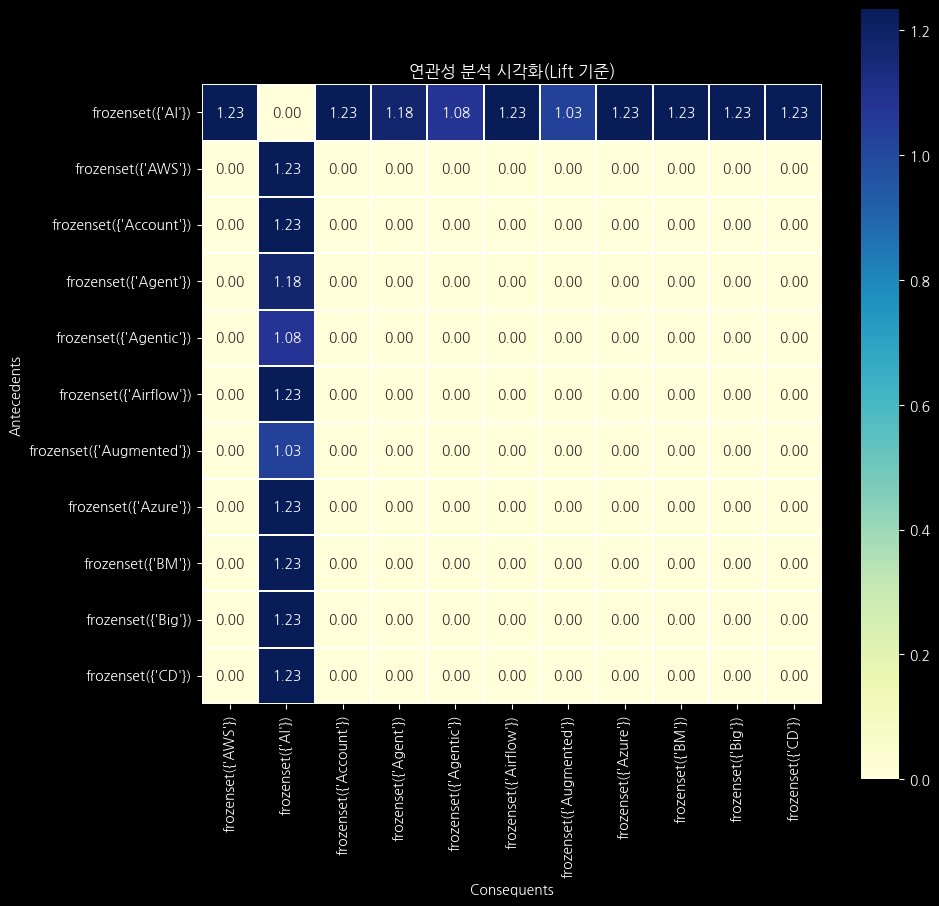

In [284]:
plt.figure(figsize=(10,10))
sns.heatmap(jobmain_pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

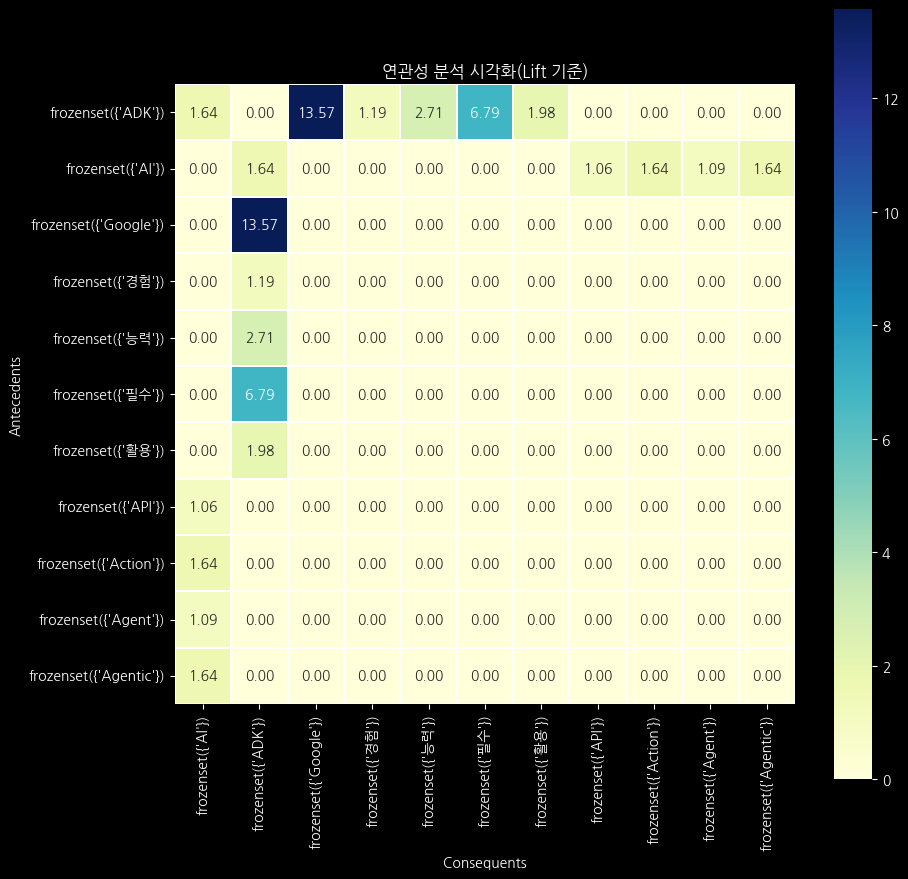

In [285]:
plt.figure(figsize=(10,10))
sns.heatmap(require_pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

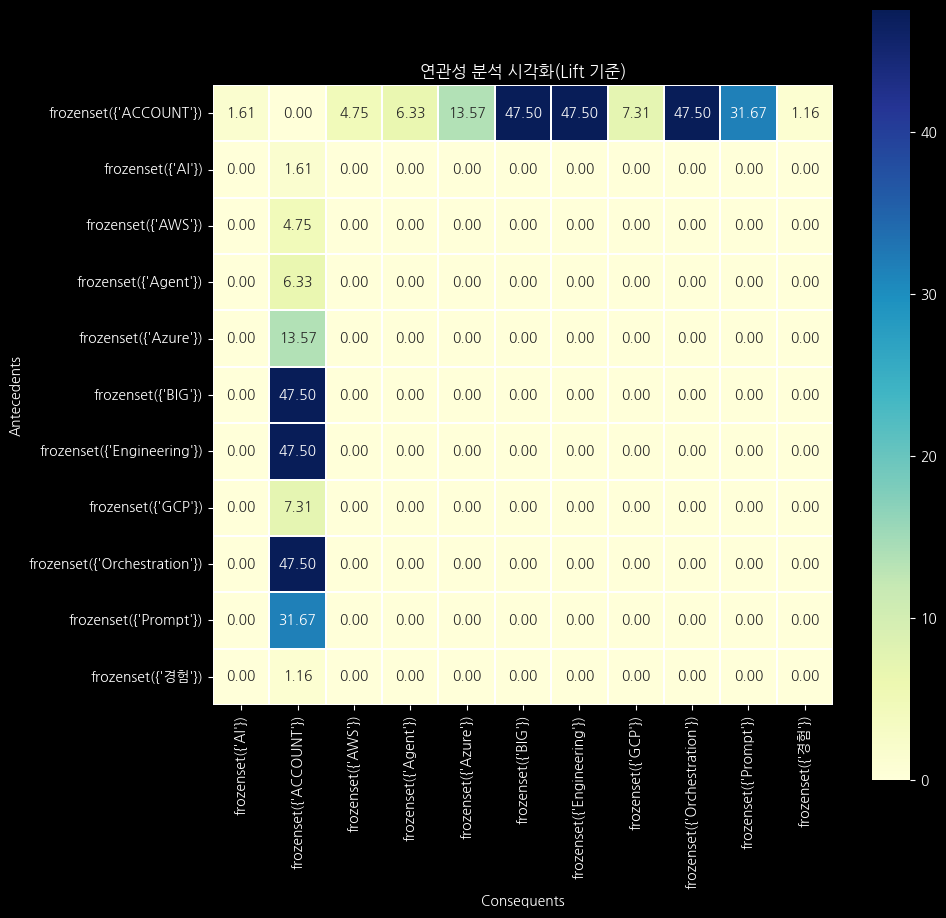

In [286]:
plt.figure(figsize=(10,10))
sns.heatmap(prefer_pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

In [287]:
jobmain_data = jobmain_rules[["antecedents", "consequents"]].head(2)
for x in jobmain_data.iterrows():
    print(f"x의 요소 개수: {len(x)}")
    print(x[0])
    print("-"*50)
    print(x[1])
    print("="*50)

x의 요소 개수: 2
0
--------------------------------------------------
antecedents     frozenset({AI})
consequents    frozenset({AWS})
Name: 0, dtype: object
x의 요소 개수: 2
1
--------------------------------------------------
antecedents    frozenset({AWS})
consequents     frozenset({AI})
Name: 1, dtype: object


In [288]:
require_data = require_rules[["antecedents", "consequents"]].head(2)
for x in require_data.iterrows():
    print(f"x의 요소 개수: {len(x)}")
    print(x[0])
    print("-"*50)
    print(x[1])
    print("="*50)

x의 요소 개수: 2
0
--------------------------------------------------
antecedents    frozenset({ADK})
consequents     frozenset({AI})
Name: 0, dtype: object
x의 요소 개수: 2
1
--------------------------------------------------
antecedents     frozenset({AI})
consequents    frozenset({ADK})
Name: 1, dtype: object


In [289]:
prefer_data = prefer_rules[["antecedents", "consequents"]].head(2)
for x in prefer_data.iterrows():
    print(f"x의 요소 개수: {len(x)}")
    print(x[0])
    print("-"*50)
    print(x[1])
    print("="*50)

x의 요소 개수: 2
0
--------------------------------------------------
antecedents    frozenset({ACCOUNT})
consequents         frozenset({AI})
Name: 0, dtype: object
x의 요소 개수: 2
1
--------------------------------------------------
antecedents         frozenset({AI})
consequents    frozenset({ACCOUNT})
Name: 1, dtype: object


In [290]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [291]:
jobmain_rules2 = jobmain_rules.sort_values(by=['lift'], ascending=False).head(50)

G1 = nx.Graph()

for _ , col_data in jobmain_rules2.iterrows():
    # 1) 단어 추출
    print(f"[BEFORE] {col_data['antecedents']}, {col_data['consequents']}")
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])
    print(f"[AFTER] {antecedent}, {consequent}")
    print("="*100)

    # 2) 지표 추출
    weight = col_data["lift"]

    # 3) 그래프에 정보 추가
    G1.add_edge(antecedent, consequent, weight=weight)

[BEFORE] frozenset({'환각'}), frozenset({'Semantic'})
[AFTER] 환각, Semantic
[BEFORE] frozenset({'Semantic'}), frozenset({'Source'})
[AFTER] Semantic, Source
[BEFORE] frozenset({'general'}), frozenset({'learning'})
[AFTER] general, learning
[BEFORE] frozenset({'instruction'}), frozenset({'general'})
[AFTER] instruction, general
[BEFORE] frozenset({'general'}), frozenset({'instruction'})
[AFTER] general, instruction
[BEFORE] frozenset({'적기'}), frozenset({'공정'})
[AFTER] 적기, 공정
[BEFORE] frozenset({'general'}), frozenset({'reward'})
[AFTER] general, reward
[BEFORE] frozenset({'reward'}), frozenset({'general'})
[AFTER] reward, general
[BEFORE] frozenset({'general'}), frozenset({'reasoning'})
[AFTER] general, reasoning
[BEFORE] frozenset({'reasoning'}), frozenset({'general'})
[AFTER] reasoning, general
[BEFORE] frozenset({'pipeline'}), frozenset({'general'})
[AFTER] pipeline, general
[BEFORE] frozenset({'출하'}), frozenset({'공정'})
[AFTER] 출하, 공정
[BEFORE] frozenset({'공정'}), frozenset({'출하'})
[AFTER

In [292]:
require_rules2 = require_rules.sort_values(by=['lift'], ascending=False).head(50)

G2 = nx.Graph()

for _ , col_data in require_rules2.iterrows():
    # 1) 단어 추출
    print(f"[BEFORE] {col_data['antecedents']}, {col_data['consequents']}")
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])
    print(f"[AFTER] {antecedent}, {consequent}")
    print("="*100)

    # 2) 지표 추출
    weight = col_data["lift"]

    # 3) 그래프에 정보 추가
    G2.add_edge(antecedent, consequent, weight=weight)

[BEFORE] frozenset({'Llamaindex'}), frozenset({'llm'})
[AFTER] Llamaindex, llm
[BEFORE] frozenset({'유저'}), frozenset({'Veo'})
[AFTER] 유저, Veo
[BEFORE] frozenset({'확률'}), frozenset({'학과'})
[AFTER] 확률, 학과
[BEFORE] frozenset({'Veo'}), frozenset({'유저'})
[AFTER] Veo, 유저
[BEFORE] frozenset({'llm'}), frozenset({'Llamaindex'})
[AFTER] llm, Llamaindex
[BEFORE] frozenset({'Llamaindex'}), frozenset({'ai'})
[AFTER] Llamaindex, ai
[BEFORE] frozenset({'ai'}), frozenset({'Llamaindex'})
[AFTER] ai, Llamaindex
[BEFORE] frozenset({'조율'}), frozenset({'솔루션'})
[AFTER] 조율, 솔루션
[BEFORE] frozenset({'대회'}), frozenset({'post'})
[AFTER] 대회, post
[BEFORE] frozenset({'post'}), frozenset({'대회'})
[AFTER] post, 대회
[BEFORE] frozenset({'논의'}), frozenset({'post'})
[AFTER] 논의, post
[BEFORE] frozenset({'Post'}), frozenset({'자원'})
[AFTER] Post, 자원
[BEFORE] frozenset({'국제'}), frozenset({'post'})
[AFTER] 국제, post
[BEFORE] frozenset({'post'}), frozenset({'국제'})
[AFTER] post, 국제
[BEFORE] frozenset({'국내'}), frozenset({'post'})


In [293]:
prefer_rules2 = prefer_rules.sort_values(by=['lift'], ascending=False).head(50)

G3 = nx.Graph()

for _ , col_data in prefer_rules2.iterrows():
    # 1) 단어 추출
    print(f"[BEFORE] {col_data['antecedents']}, {col_data['consequents']}")
    antecedent = ",".join(col_data["antecedents"])
    consequent = ",".join(col_data["consequents"])
    print(f"[AFTER] {antecedent}, {consequent}")
    print("="*100)

    # 2) 지표 추출
    weight = col_data["lift"]

    # 3) 그래프에 정보 추가
    G3.add_edge(antecedent, consequent, weight=weight)

[BEFORE] frozenset({'ACCOUNT'}), frozenset({'Orchestration'})
[AFTER] ACCOUNT, Orchestration
[BEFORE] frozenset({'Orchestration'}), frozenset({'ACCOUNT'})
[AFTER] Orchestration, ACCOUNT
[BEFORE] frozenset({'ACCOUNT'}), frozenset({'Engineering'})
[AFTER] ACCOUNT, Engineering
[BEFORE] frozenset({'Engineering'}), frozenset({'ACCOUNT'})
[AFTER] Engineering, ACCOUNT
[BEFORE] frozenset({'OR'}), frozenset({'Tools'})
[AFTER] OR, Tools
[BEFORE] frozenset({'Tools'}), frozenset({'OR'})
[AFTER] Tools, OR
[BEFORE] frozenset({'안정'}), frozenset({'완벽'})
[AFTER] 안정, 완벽
[BEFORE] frozenset({'실행'}), frozenset({'해답'})
[AFTER] 실행, 해답
[BEFORE] frozenset({'해답'}), frozenset({'실행'})
[AFTER] 해답, 실행
[BEFORE] frozenset({'실행'}), frozenset({'지향'})
[AFTER] 실행, 지향
[BEFORE] frozenset({'안정'}), frozenset({'해답'})
[AFTER] 안정, 해답
[BEFORE] frozenset({'반응'}), frozenset({'UX'})
[AFTER] 반응, UX
[BEFORE] frozenset({'UX'}), frozenset({'반응'})
[AFTER] UX, 반응
[BEFORE] frozenset({'Engineering'}), frozenset({'Orchestration'})
[AFTER] E

[14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25]


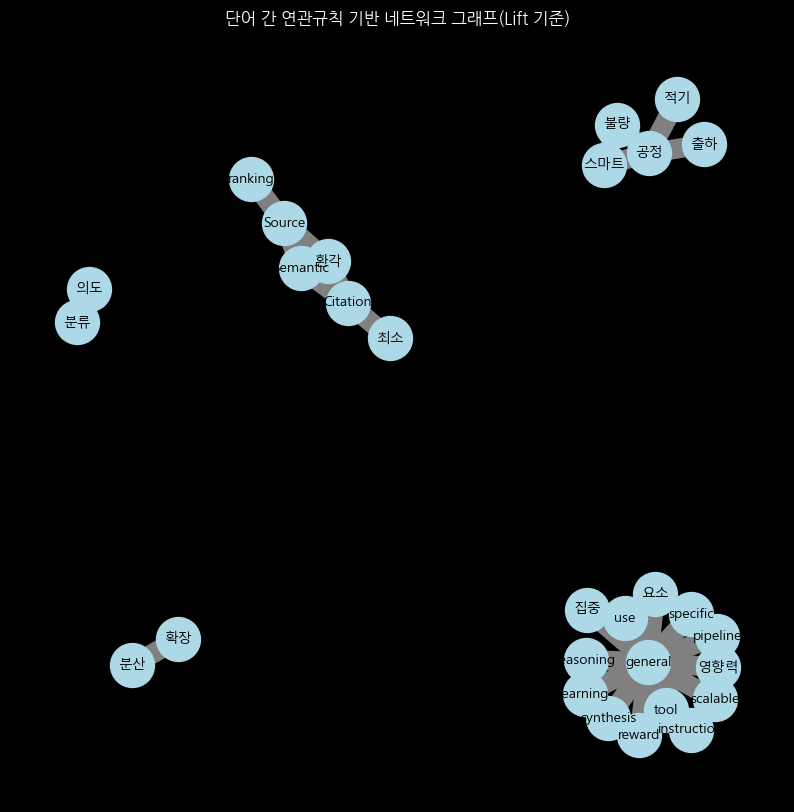

In [294]:
# 3. 노드 배치
# position = nx.kamada_kawai_layout(G, scale=0.5)
# k를 조절하면 노드간 거리를 조절할 수 있습니다.
position = nx.spring_layout(G1, k=0.9, seed=15)

# 4. 가중치 추출
scale = 0.3 ## 선의 굵기가 너무 굵다면 사이즈를 줄일 수 있습니다.
edge_weights = [G1[u][v]["weight"]*scale for u, v in G1.edges()]
print(edge_weights)

# 5. 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G1, position, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G1, position, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G1, position, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

[14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25]


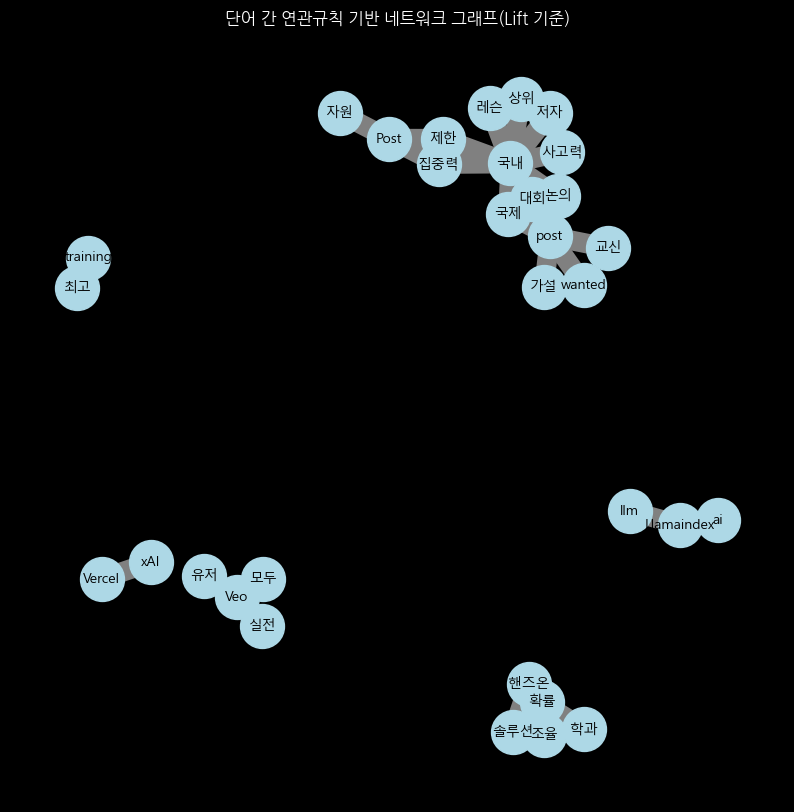

In [295]:
# 3. 노드 배치
# position = nx.kamada_kawai_layout(G, scale=0.5)
# k를 조절하면 노드간 거리를 조절할 수 있습니다.
position2 = nx.spring_layout(G2, k=0.9, seed=15)

# 4. 가중치 추출
scale = 0.3 ## 선의 굵기가 너무 굵다면 사이즈를 줄일 수 있습니다.
edge_weights = [G2[u][v]["weight"]*scale for u, v in G2.edges()]
print(edge_weights)

# 5. 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G2, position2, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G2, position2, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G2, position2, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

[14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25, 14.25]


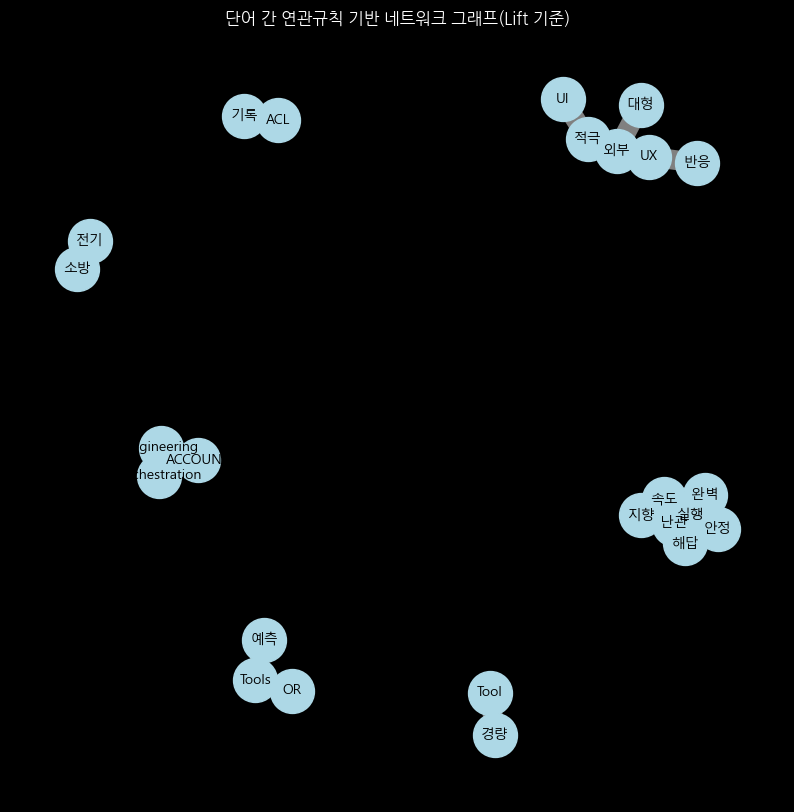

In [296]:
# 3. 노드 배치
# position = nx.kamada_kawai_layout(G, scale=0.5)
# k를 조절하면 노드간 거리를 조절할 수 있습니다.
position3 = nx.spring_layout(G3, k=0.9, seed=15)

# 4. 가중치 추출
scale = 0.3 ## 선의 굵기가 너무 굵다면 사이즈를 줄일 수 있습니다.
edge_weights = [G3[u][v]["weight"]*scale for u, v in G3.edges()]
print(edge_weights)

# 5. 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G3, position3, node_color="lightblue", node_size=1000)
nx.draw_networkx_edges(G3, position3, edge_color="gray", width=edge_weights)
nx.draw_networkx_labels(G3, position3, font_size=10, font_family="Malgun Gothic")
plt.title("단어 간 연관규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()